# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Seyram | Atsu Quist | SeyramAtsuQuist,15-10-24 | 5 | 25% |
| Member 2: | Akosua | Gyimah | AkosuaGyimah,07-10-24 | 5 | 25% |
| Member 3: | Gideon | Asamoah | GideonAsamoah,15-10-24 | 5 | 25% |
| Member 4: | Joseph | Mills | josephmills,15-10-24 | 4  | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

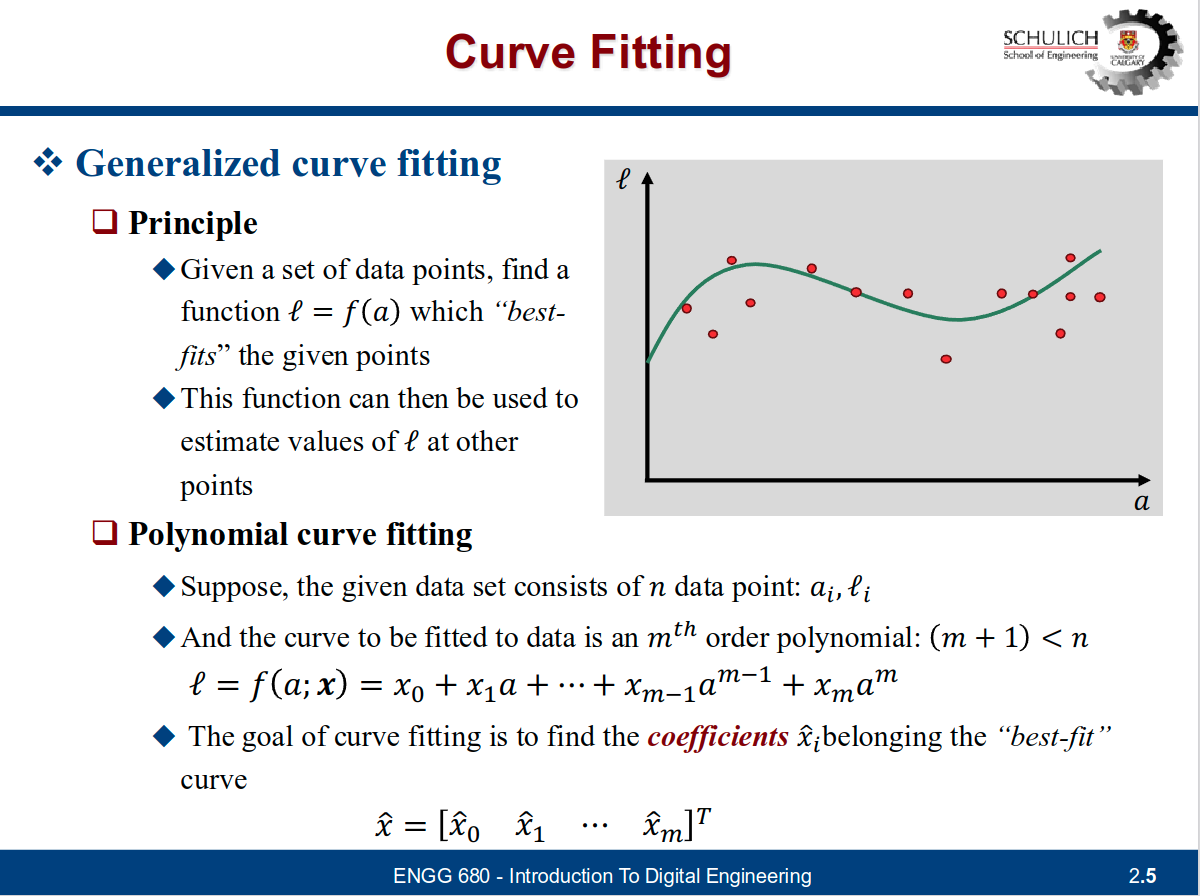

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [2]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/data.xlsx')
arr_data = df_data.to_numpy()

#print(f"The arr_data is: {arr_data}")   #This code was to visualize the array(not in origanl content)

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = df_data['l'].to_numpy()
l_var = df_data['l_var'].to_numpy()
l_true = df_data['l_true'].to_numpy()

#print(f"The noisy observations are:{l}")             #This code was to visualize the array(not in origanl content)
#print(f"The variance of observations are:{l_var}")   #This code was to visualize the array(not in origanl content)
#print(f"The true observations are:{l_true}")         #This code was to visualize the array(not in origanl content)

In [4]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)
print(n)       #This code was to visualize the array(not in origanl content)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)
print(P)      #This code was to visualize the array(not in origanl content)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)

500
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


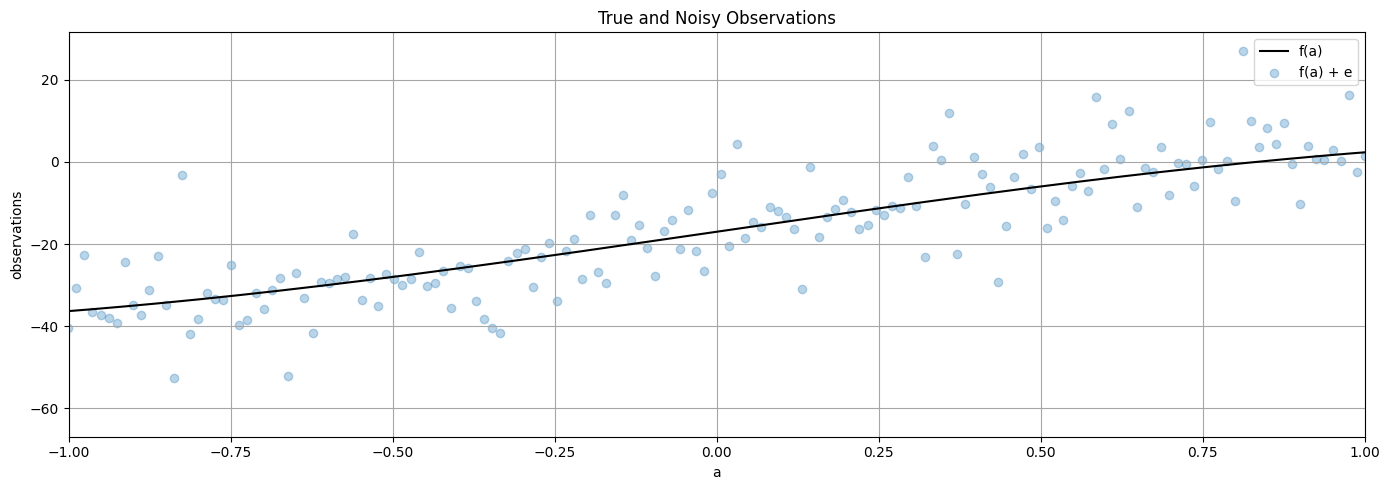

In [5]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)
        #ANSWER#
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plotting the true observations as a line
ax.plot(a, l_true, label='f(a)', color='k')

# Plotting the noisy observations as a scatter plot
ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)

# Adding Labels, Title and legend
ax.set_xlabel('a')
ax.set_ylabel('observations')
ax.set_title('True and Noisy Observations')
ax.legend()

# limiting the x-ayis scale from -1 to 1
ax.set_xlim(-1, 1)

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()


plt.show()

In [6]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

     # Step i: Creating the design matrix A
    A = np.vander(a, deg + 1, increasing=True)
    w= np.linalg.inv(P)
    A_Weighted = w @ A
    l_Weighted = w @ l
    x= np.linalg.inv(A_Weighted.T @ w @ A_Weighted) @ (A_Weighted.T @ w @ l_Weighted)
    v= l - A @ x
    residual_variance = np.var(v)
    apv = residual_variance / (len(l) - len(x))
    cov_x = residual_variance * np.linalg.inv(A_Weighted.T @ A_Weighted)
    return (x, cov_x, apv, v)

In [7]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

# Polynomial degrees to test
degrees = [1, 3, 5]
results = {}

# Looping over the degrees and fitting the polynomial curve
for deg in degrees:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)
    results[deg] = {
        'coefficients': x,
        'covariance': cov_x,
        'posterior_variance': apv,
        'residuals': v
    }

    # Printing results for each degree
    print(f"Estimated coefficients (degree {deg}): {x}")
    print(f"Covariance matrix (degree {deg}): \n{cov_x}")
    print(f"A posteriori variance factor (degree {deg}): {apv}")
    print(f"Residuals (degree {deg}): {v}")
    print("-" * 50)  # Separator between results



Estimated coefficients (degree 1): [-16.59352348   7.25633807]
Covariance matrix (degree 1): 
[[3.24183276e-01 1.11579683e-17]
 [1.11579683e-17 9.81465270e-02]]
A posteriori variance factor (degree 1): 0.325485217208644
Residuals (degree 1): [ 2.31950929e+01  2.33624696e+01  5.16650752e-01  2.33475847e+01
  1.96698387e+01  2.37681600e+01  2.33453696e+01  2.18331528e+01
  2.11355408e+01  5.61358715e+00  2.24756392e+01  1.33407067e+01
  2.34014210e+01  2.24034178e+01  1.13532794e+01  2.53650032e+01
  1.44202357e+01  8.52085442e+00  1.79247562e+01  2.11851700e+00
  1.46072683e+01  9.70673172e+00  1.30817824e+01  1.63166651e+01
  1.15688083e+01  1.16383392e+01  6.07754648e+00  3.24693889e+01
  1.42879391e+01  1.41679638e+01  1.73166729e+01  7.83535648e+00
  1.73215977e+01  1.35522578e+01 -5.87401633e+00 -2.04342770e+00
  8.45600371e+00 -7.17469845e+00  7.13670400e+00  4.93927812e+00
  7.53688443e+00  1.29373203e+01  6.55314295e+00  5.69877998e+00
  1.01514943e+01  4.53954123e+00  1.4875208

In [8]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = np.polyval(results[1]['coefficients'][::-1], a)
cubic_uw = np.polyval(results[3]['coefficients'][::-1], a)
quintic_uw = np.polyval(results[5]['coefficients'][::-1], a) #Changed from results[3] to results[5] to get coefficients for degree 5

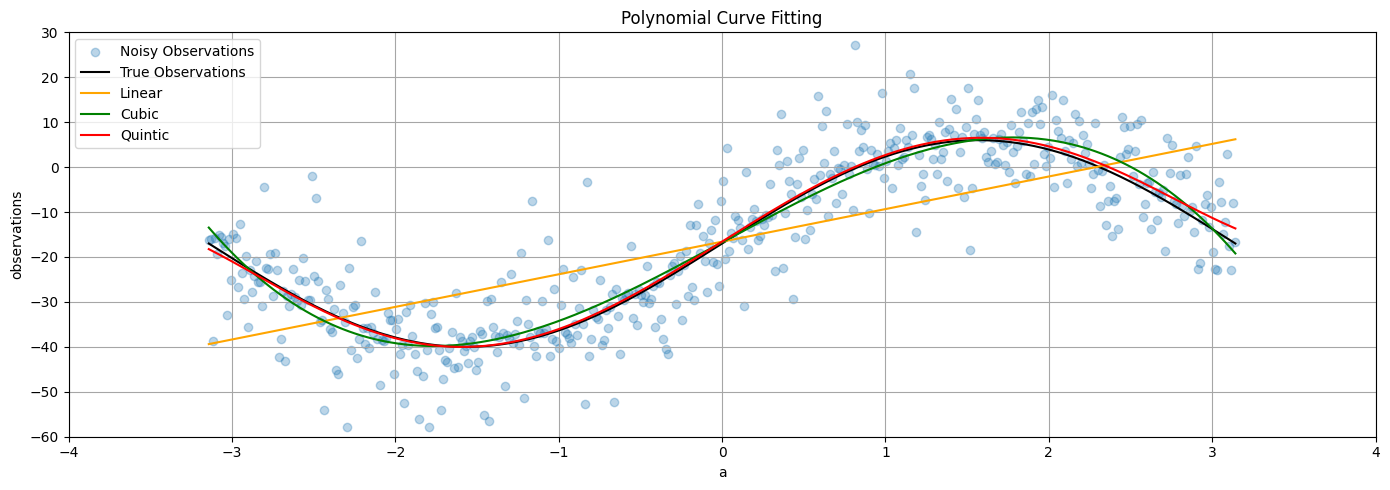

In [9]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

# Plotting the polynomial functions, noisy observations, and true observations
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Scatter plot of noisy observations (l) on the axis
ax.scatter(a, l, color='tab:blue', alpha=0.3, label='Noisy Observations', marker='o')

# Plottinng true observations (l_true) on the same axis
ax.plot(a, l_true, color='k', label='True Observations')

# Plotting the polynomial functions
ax.plot(a, line_uw, label='Linear', color='orange')
ax.plot(a, cubic_uw, label='Cubic', color='green')
ax.plot(a, quintic_uw, label='Quintic', color='red')

# Adding Labels, Title and legend
ax.set_xlabel('a')
ax.set_ylabel('observations')
ax.set_title('Polynomial Curve Fitting')
ax.legend()

ax.grid(True, which='both',ls='-',color='0.65')

#limiting x Scale from -1 to 1
ax.set_xlim(-4, 4)

#limiting y Scale from -100 to 100
ax.set_ylim(-60, 30)

fig.tight_layout()

In [10]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
# Fitting polynomial for degree 1 (linear), 3 (cubic), and 5 (quintic)
x1, cov_x1, apv1, v1 = fit_polynomial_curve(a, l, P, 1)  # Degree 1
x3, cov_x3, apv3, v3 = fit_polynomial_curve(a, l, P, 3)  # Degree 3
x5, cov_x5, apv5, v5 = fit_polynomial_curve(a, l, P, 5)  # Degree 5

# Print the a posteriori variance factor (apv) for each polynomial degree
print(f"A posteriori variance factor (degree 1 - Linear): {apv1}")
print(f"A posteriori variance factor (degree 3 - Cubic): {apv3}")
print(f"A posteriori variance factor (degree 5 - Quintic): {apv5}")


A posteriori variance factor (degree 1 - Linear): 0.325485217208644
A posteriori variance factor (degree 3 - Cubic): 0.13226455566263767
A posteriori variance factor (degree 5 - Quintic): 0.12751668926036838


In [11]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)

# Computing the predicted observations for each polynomial
predicted_linear = line_uw  # Linear predictions
predicted_cubic = cubic_uw   # Cubic predictions
predicted_quintic = quintic_uw  # Quintic predictions

# Computing the L2 norm between predicted observations and true observations
L2_norm_linear = np.linalg.norm(predicted_linear - l_true)
L2_norm_cubic = np.linalg.norm(predicted_cubic - l_true)
L2_norm_quintic = np.linalg.norm(predicted_quintic - l_true)

# Printing the results
print(f"L2-Norm between predicted observations and true observations (degree 1 - Linear): {L2_norm_linear}")
print(f"L2-Norm between predicted observations and true observations (degree 3 - Cubic): {L2_norm_cubic}")
print(f"L2-Norm between predicted observations and true observations (degree 5 - Quintic): {L2_norm_quintic}")


L2-Norm between predicted observations and true observations (degree 1 - Linear): 229.06016796744092
L2-Norm between predicted observations and true observations (degree 3 - Cubic): 38.285979929116635
L2-Norm between predicted observations and true observations (degree 5 - Quintic): 17.36996719696425


In [12]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
            #ANSWER#
print("ANSWER: As observed from the results, Both the a posteriori variance factor and the norm decreases as we move from degree 1 linear to degree 3 cubic to degree 5 quintic models. A lower a posteriori variance factor means that the model has captured the underlying pattern of the data more effectively")


ANSWER: As observed from the results, Both the a posteriori variance factor and the norm decreases as we move from degree 1 linear to degree 3 cubic to degree 5 quintic models. A lower a posteriori variance factor means that the model has captured the underlying pattern of the data more effectively


In [13]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1/l_var)
print(P)

[[0.02777778 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00694444 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00591716 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.04       0.         0.        ]
 [0.         0.         0.         ... 0.         0.015625   0.        ]
 [0.         0.         0.         ... 0.         0.         0.25      ]]


A posteriori variance factor (degree 1 - Linear): 0.32558642491762624
A posteriori variance factor (degree 3 - Cubic): 0.1333050006883571
A posteriori variance factor (degree 5 - Quintic): 0.1312706280921256
L2-Norm between predicted observations and true observations (degree 1 - Linear): 74.78655952763127
L2-Norm between predicted observations and true observations (degree 3 - Cubic): 14.68391915730825
L2-Norm between predicted observations and true observations (degree 5 - Quintic): 15.394702279674679


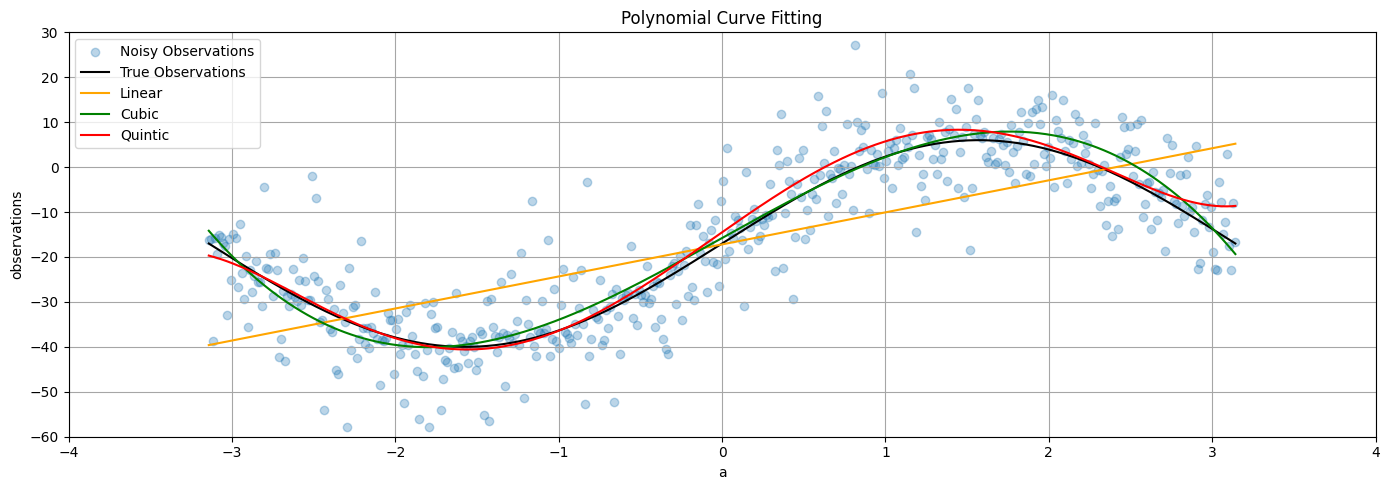

In [14]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

          #ANSWER#
# Repeated step 6
results = {}
degrees = [1, 3, 5]

for deg in degrees:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)
    results[deg] = {
        'coefficients': x,
        'covariance': cov_x,
        'posterior_variance': apv,
        'residuals': v
    }
# REPEATED step 7
line_uw = np.polyval(results[1]['coefficients'][::-1], a)
cubic_uw = np.polyval(results[3]['coefficients'][::-1], a)
quintic_uw = np.polyval(results[5]['coefficients'][::-1], a) # Changed from results[3] to results[5] to get coefficients for degree 5

# REPEATED step 8
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))   # Plotting the polynomial functions, noisy observations, and true observations

ax.scatter(a, l, color='tab:blue', alpha=0.3, label='Noisy Observations', marker='o')   # Scatter plot of noisy observations (l) on the axis

ax.plot(a, l_true, color='k', label='True Observations')    # Plotting true observations (l_true) on the same axis

# Plotting the polynomial functions
ax.plot(a, line_uw, label='Linear', color='orange')
ax.plot(a, cubic_uw, label='Cubic', color='green')
ax.plot(a, quintic_uw, label='Quintic', color='red')

# Adding Labels, Title and legend
ax.set_xlabel('a')
ax.set_ylabel('observations')
ax.set_title('Polynomial Curve Fitting')
ax.legend()
ax.grid(True, which='both',ls='-',color='0.65')

ax.set_xlim(-4, 4)#limiting x Scale from -3 to 3

ax.set_ylim(-60,30)   #limiting y Scale from -60 to 30
fig.tight_layout()

# REPEATED Step 9
# Fitting the polynomial for degree 1 (linear), 3 (cubic), and 5 (quintic)
x1, cov_x1, apv1, v1 = fit_polynomial_curve(a, l, P, 1)  # Degree 1
x3, cov_x3, apv3, v3 = fit_polynomial_curve(a, l, P, 3)  # Degree 3
x5, cov_x5, apv5, v5 = fit_polynomial_curve(a, l, P, 5)  # Degree 5

print(f"A posteriori variance factor (degree 1 - Linear): {apv1}")
print(f"A posteriori variance factor (degree 3 - Cubic): {apv3}")
print(f"A posteriori variance factor (degree 5 - Quintic): {apv5}")

predicted_linear = np.polyval(results[1]['coefficients'][::-1], a)
predicted_cubic = np.polyval(results[3]['coefficients'][::-1], a)
predicted_quintic = np.polyval(results[5]['coefficients'][::-1], a)

# REPEATED Step 10
# Define a function to compute the weighted L2-norm
def compute_L2_norm(predicted, true, P):
    """
    Computes the weighted L2-norm between predicted and true observations using the weight matrix P.

    Parameters:
    predicted (np.array): The predicted observations.
    true (np.array): The true observations.
    P (np.array): The weight matrix (usually the inverse of the covariance matrix).

    Returns:
    float: The weighted L2-norm.
    """
    residuals = predicted - true      # Computing the residuals

    L2_norm = np.sqrt(residuals.T @ P @ residuals)    # Computing the weighted L2-norm
    return L2_norm

# Computing the predicted observations for each polynomial
predicted_linear = line_uw  # Linear predictions
predicted_cubic = cubic_uw  # Cubic predictions
predicted_quintic = quintic_uw  # Quintic predictions

# Computing the weighted L2-norm for each polynomial degree
L2_norm_linear = compute_L2_norm(predicted_linear, l_true, P)
L2_norm_cubic = compute_L2_norm(predicted_cubic, l_true, P)
L2_norm_quintic = compute_L2_norm(predicted_quintic, l_true, P)


# Printing the results
print(f"L2-Norm between predicted observations and true observations (degree 1 - Linear): {L2_norm_linear}")
print(f"L2-Norm between predicted observations and true observations (degree 3 - Cubic): {L2_norm_cubic}")
print(f"L2-Norm between predicted observations and true observations (degree 5 - Quintic): {L2_norm_quintic}")


In [15]:
# step 14
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
      #ANSWER#
print("After applying the P-matrix, the a posteriori variance factors show a clear reduction and are closer to 1. This suggests that the model fits the data better and is more accurate with the weighted approach.")
print("The L2-Norm values significantly decrease after applying the P-matrix, particularly for the higher-degree polynomials. This indicates that the weighted LSE has a better fit to the true observations compared to the unweighted case")

After applying the P-matrix, the a posteriori variance factors show a clear reduction and are closer to 1. This suggests that the model fits the data better and is more accurate with the weighted approach.
The L2-Norm values significantly decrease after applying the P-matrix, particularly for the higher-degree polynomials. This indicates that the weighted LSE has a better fit to the true observations compared to the unweighted case


# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

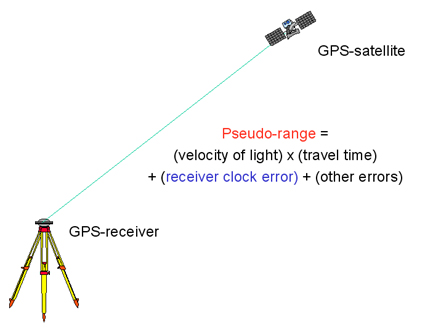

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [16]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
import pandas as pd
df_pseudorange = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/satellite_position.xlsx')

pseudorange = df_pseudorange['P'].to_numpy()
sat_pos = df_sat_pos[['x', 'y', 'z']].to_numpy()

In [17]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m = 4
print(f" n is:{n}")       #this is to visualise results
print(f" m is:{m}")       #this is to visualise results

 n is:11
 m is:4


In [18]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.eye(n)
print(P)   #this is to visualise results

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [19]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)
print(f"The initial state is:{x_0}")   #this is to visualise results

The initial state is:[0. 0. 0. 0.]


In [20]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])
print(GroundTruth)   #this is to visualise results

[-1633489.37967725 -3651627.18250363  4952481.61954918]


In [21]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [22]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
import numpy as np

def euclidean_norm(receiver_pos, satellite_pos):
  #satellite_pos = satellite_pos[:, :3]
  # Calculate the distance between receiver and each satellite
  distance = np.linalg.norm(satellite_pos - receiver_pos, axis=1)
  return distance #The distance between receiver and satellite


In [23]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
    num_satellites = s_pos.shape[0]
    A = np.zeros((num_satellites, 4))  # Initialize A

    for i in range(num_satellites):
        #satellite_position = s_pos[i, :3]  # Shape (3,)
        diff = s_pos[i] - r_pos  # Now both are shape (3,)
        norm_diff = np.linalg.norm(diff)  # Calculate the norm

        if norm_diff > 0:
            A[i, 0] = diff[0] / norm_diff  # Partial derivative w.r.t x
            A[i, 1] = diff[1] / norm_diff  # Partial derivative w.r.t y
            A[i, 2] = diff[2] / norm_diff  # Partial derivative w.r.t z
            A[i, 3] = -1
    return A

In [28]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)


while np.linalg.norm(delta[:3]) >= 0.001:
    # Compute the geometric distance between Satellites and receiver, using the euclidean_norm function we just defined
    # (1 mark)
    rho = euclidean_norm(x_hat[:3], sat_pos)

    # Compute the design matrix A
    # (1 mark)
    A = design_matrix(x_hat[:3], sat_pos)

    # Compute the misclosure array w
    # (1 mark)
    w = pseudorange - (rho + x_hat[3])#[:, 0]

    # Compute the corrections delta
    # (1 mark)
    delta = np.linalg.pinv(A.T @ P @ A) @ (A.T @ P @ w)

    # Update the states
    # (1 mark)
    x_hat += delta
    #x_hat[:3] += delta[:3]  # Update x, y, z position
    #x_hat[3] += delta[3]    # Update clock bias

    # Compute the position error from using the updated states against ground truth
    # (1 mark)
    err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)

    # Update the counter i (i.e., increment of 1 for each iteration)
    # (1 mark)
    i += 1

    # Store the misclosure, delta, position error, and counter from each iteration into arrays, we will use them for plotting
    # (1 mark)
    arr_w.append(w)
    arr_delta.append(delta)
    arr_err_pos.append(err_pos)
    arr_i.append(i)

# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 mark)
v = w - A @ delta  # Residuals
apv = (v.T @ P @ v) / (n - m)

# Compute the Covariance matrix of estimated states
# (1 mark)
C_x_hat = apv * np.linalg.pinv(A.T @ P @ A)


In [29]:
# step 10
#"""
#Print:
#      {estimated states,
#       corrections array,
#       estimated measurements residuals,
#       A posteriori Variance of Unit Weight,
#       Covariance matrix of estimated states,
#       number of iterations,
#       3-D position errors},

#after the LSE convergence to the console.
#"""
# (7 marks)

    #ANSWER#
print("Results after LSE Convergence:")
print(f"Estimated States (x, y, z, clock bias): {x_hat}")
print(f"Corrections Array (delta): {delta}")
print(f"Estimated Measurements Residuals (w): {v}")
print(f"A Posteriori Variance of Unit Weight (apv): {apv}")
print(f"Covariance Matrix of Estimated States (C_x_hat):\n{C_x_hat}")
print(f"Number of Iterations: {i}")
print(f"3-D Position Errors: {err_pos}")

Results after LSE Convergence:
Estimated States (x, y, z, clock bias): [nan nan nan nan]
Corrections Array (delta): [nan nan nan nan]
Estimated Measurements Residuals (w): [nan nan nan nan nan nan nan nan nan nan nan]
A Posteriori Variance of Unit Weight (apv): nan
Covariance Matrix of Estimated States (C_x_hat):
[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]
Number of Iterations: 483
3-D Position Errors: nan


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
